In [11]:
import razor.flow as rf
from razor.api import datasources, engines
from razor.api import project_space_path
import logging
import time
import typing as typ
import pandas as pd

logger = logging.getLogger()


In [12]:
# lib1 = razor.api.libraries('pyarrow')

In [16]:
@rf.block
class STDIn:    
    filename: str
    out_ds: rf.Output[typ.Any] = rf.Output(transport=rf.KafkaTransport)

    def run(self):
        df = pd.read_parquet(project_space_path(self.filename))

        logger.info(df.shape)
        self.out_ds.put(df)


@rf.block
class STDOut:    
    in_ds: typ.Any
    out_filename: str

    def run(self):
        logger.info(self.in_ds.shape)
#         sftp_c = datasources('test_source').client()
        self.in_ds.to_parquet(project_space_path(self.out_filename), index=False)
            

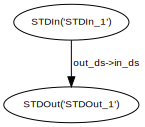

In [17]:
config = {'cores': 1, 'ram': 4096}

size = '10MB'
ip_filename = "/data/sdk_testbench/input_data/dummy_"+size+"_df.parquet"
op_filename = "/data/sdk_testbench/output_data/tc_01.parquet"

std_in = STDIn(filename=ip_filename)
# std_in.executor = rf.ContainerExecutor(cores=config['cores'], memory=config['ram'])
# std_in.out_ds = rf.Output.set(transport=rf.KafkaTransport)

std_out = STDOut(in_ds=std_in.out_ds, out_filename=op_filename)
# std_out.executor = rf.ContainerExecutor(cores=config['cores'], memory=config['ram'])

pipeline = rf.Pipeline(name='atomic_kafka_transport', targets=[std_out])
pipeline.show()

In [6]:
def create_pipeline():
    return pipeline

PlatformPipelineRun(project_id='429201ac-2328-40ef-97f8-843445a287fe', pipeline_id='a74c8ad6-0c66-11eb-809c-0242ac11000b', pipeline_name='atomic_kafka_transport', pipeline_run_id='d9bb4998-d3c6-4aff-a31e-9749d423ced9', pipeline_version=None, comment=None, created_on='2020-10-12T08:41:13.258+00:00', start_time=None, end_time=None, eta=0, run_at=1602492073258, run_duration=0, compute_time=0, wait_time=744, ran_by_user=RanByUser(user_name='Ayan Basak', email='ayan.basak@razorthink.com'), status='IN_PROGRESS', block_status=[PlatformPipelineBlockRun(pipeline_run_id='d9bb4998-d3c6-4aff-a31e-9749d423ced9', pipeline_name='atomic_kafka_transport', pipeline_status='IN_PROGRESS', block_id='ab7b433e-8d5f-496f-b00e-c96ed6ed9da3', block_run_id='5d9b0ad6-09b2-4c97-9ae4-fb88fb85178d', block_name='STDIn_1', resource_spec=ResourceAllocated(cores=1, memory=1024, use_gpu=False, gpu=0, use_gpu_if_available=False, cluster_configuration={'worker': None, 'workerCore': None, 'workerMemory': None, 'numberOfInstances': None, 'maxServerCount': None}, additional_env={}, run_env='PYTHON'), technology='PYTHON', status='READY_TO_GO', containers=[], cluster_id='ab7b433e-8d5f-496f-b00e-c96ed6ed9da3', _log=None, _metric=None, wait_time=0, compute_time=0, start_time=None, end_time=None, queued_at='2020-10-12T08:41:14.000+00:00'), PlatformPipelineBlockRun(pipeline_run_id='d9bb4998-d3c6-4aff-a31e-9749d423ced9', pipeline_name='atomic_kafka_transport', pipeline_status='IN_PROGRESS', block_id='8e7fa25d-476b-415d-9d34-73e40c52bb70', block_run_id='09fba4e2-cff6-48dc-81b7-5b2adb094a7b', block_name='STDOut_1', resource_spec=ResourceAllocated(cores=1, memory=1024, use_gpu=False, gpu=0, use_gpu_if_available=False, cluster_configuration={'worker': None, 'workerCore': None, 'workerMemory': None, 'numberOfInstances': None, 'maxServerCount': None}, additional_env={}, run_env='PYTHON'), technology='PYTHON', status='YET_TO_START', containers=[], cluster_id='8e7fa25d-476b-415d-9d34-73e40c52bb70', _log=None, _metric=None, wait_time=0, compute_time=0, start_time=None, end_time=None, queued_at=None)], run_number=1272, pipeline_variable_list=[], block_run_details=[BlockRunDetail(block_id='ab7b433e-8d5f-496f-b00e-c96ed6ed9da3', block_run_id='5d9b0ad6-09b2-4c97-9ae4-fb88fb85178d', block_name='STDIn_1', technology='PYTHON', log_path=None, input_parameters='{\n  "filename": {\n    "dtype": "str",\n    "required": "false",\n    "series": false,\n    "adapter": "eJxrYJmqxgABPYJFiVX5RXppOfnlern5Kak5xVN6ePLy8wviE1MSC0pSi6ZMnqIHAF/+ELQ=",\n    "validator": "eJxrYJmqwQABPYJFiVX5RXppOfnlern5Kak5xVN6+PLy8wviyxJzMlMSS/KLpkyeogcAg2wRnQ==",\n    "source_id": null,\n    "source_name": null,\n    "inferred_type": "STATIC",\n    "value": "eJxrYJlqwQABPSb6KYklifrFKdnxJanFJUmpeckZ+pl5BaUl8WCJlNLc3Mp4QwNfp/iUNL2CxKLC0tSSKXoAs3wWiA=="\n  }\n}', output_parameters=None, status='READY_TO_GO', created_at='2020-10-12T08:41:13.353+00:00', queued_at='2020-10-12T08:41:14.000+00:00', start_time=None, end_time=None, compute_time=0, wait_time=0, run_time=0, block_run_output_list=[BlockRunOutputList(output_id='e1ed96c8-d909-44e9-9bfb-9f2cb9addae6', output_name='out_ds', created_on='2020-10-12T08:41:13.461+00:00', output_status='YET_TO_START', block_transport='KAFKA')], resource_allocated=ResourceAllocated(cores=1, memory=1024, use_gpu=False, gpu=0, use_gpu_if_available=False, cluster_configuration={'worker': None, 'workerCore': None, 'workerMemory': None, 'numberOfInstances': None, 'maxServerCount': None}, additional_env={}, run_env='PYTHON')), BlockRunDetail(block_id='8e7fa25d-476b-415d-9d34-73e40c52bb70', block_run_id='09fba4e2-cff6-48dc-81b7-5b2adb094a7b', block_name='STDOut_1', technology='PYTHON', log_path=None, input_parameters=None, output_parameters=None, status='YET_TO_START', created_at='2020-10-12T08:41:13.472+00:00', queued_at=None, start_time=None, end_time=None, compute_time=0, wait_time=0, run_time=0, block_run_output_list=[], resource_allocated=ResourceAllocated(cores=1, memory=1024, use_gpu=False, gp